In [82]:
import pandas as pd  # 데이터 전처리를 위해서 
import seaborn as sns # 시각화를 위해서 

col_names = ['sepal-length', 'sepal-width','petal-length', 'petal-width','Class']

df =  pd.read_csv('c:\\data\\iris2.csv', encoding='UTF-8', header=None, names=col_names)

print(df.shape)  # (149, 5)


(150, 5)


In [83]:
# DataFrame 확인
print(df.info())  # 전부 object (문자)형으로 되어있음
print(df.describe())
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.50000

In [84]:
# X = 전체 행, 마지막 열 제외한 모든 열 데이터 -> n차원 공간의 포인트
X = df.iloc[:,:-1].to_numpy() 
y = df.iloc[:,-1].to_numpy()   

print(len(X))  # 149
print(len(y))  # 149

150
150


In [86]:
from sklearn import preprocessing 

#X=preprocessing.StandardScaler().fit(X).transform(X)  
X=preprocessing.MinMaxScaler().fit(X).transform(X) 
#print(X)

In [87]:
from sklearn.model_selection import train_test_split 
                                                                                     
# 훈련 데이터 75, 테스트 데이터 25으로 나눈다. 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state = 10)

print(X_train.shape)   # (111, 4)
print(y_train.shape)   # (111,)

(112, 4)
(112,)


In [88]:
# 학습/예측(Training/Pradiction)
# sklearn 라이브러리에서 Decision Tree 분류 모형 가져오기
from sklearn import tree

#  의사결정트리 분류기를 생성 (criterion='entropy' 적용)
classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
#classifier = tree.DecisionTreeClassifier(criterion='gini', max_depth=3)
# 메뉴얼 : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [89]:
# 분류기 학습
classifier.fit(X_train, y_train)

# 특성 중요도
print(df.columns.values)
print("특성 중요도 : \n{}".format(classifier.feature_importances_))

['sepal-length' 'sepal-width' 'petal-length' 'petal-width' 'Class']
특성 중요도 : 
[0.         0.         0.70789981 0.29210019]


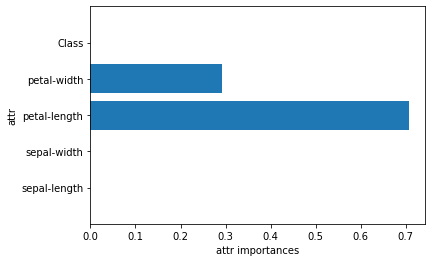

In [90]:
import matplotlib.pyplot as plt
import numpy as np


def plot_feature_importances_cancer(model):
    n_features = df.shape[1]
    plt.barh(range(n_features-1),model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df.columns.values)
    plt.xlabel("attr importances")
    plt.ylabel("attr")
    plt.ylim(-1,n_features)

plot_feature_importances_cancer(classifier)
plt.show()



In [98]:
y_pred= classifier.predict(X_test)
print(y_pred)

# 작은 이원교차표
from sklearn.metrics import confusion_matrix
conf_matrix= confusion_matrix(y_test, y_pred)
print(conf_matrix)    

['Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica']
[[11  0  0]
 [ 0 15  0]
 [ 0  1 11]]


In [96]:
# 정밀도 , 재현율, f1 score 확인 
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [94]:
# 정확도 확인하는 코드 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score( y_test, y_pred)
print( accuracy) 

0.9736842105263158


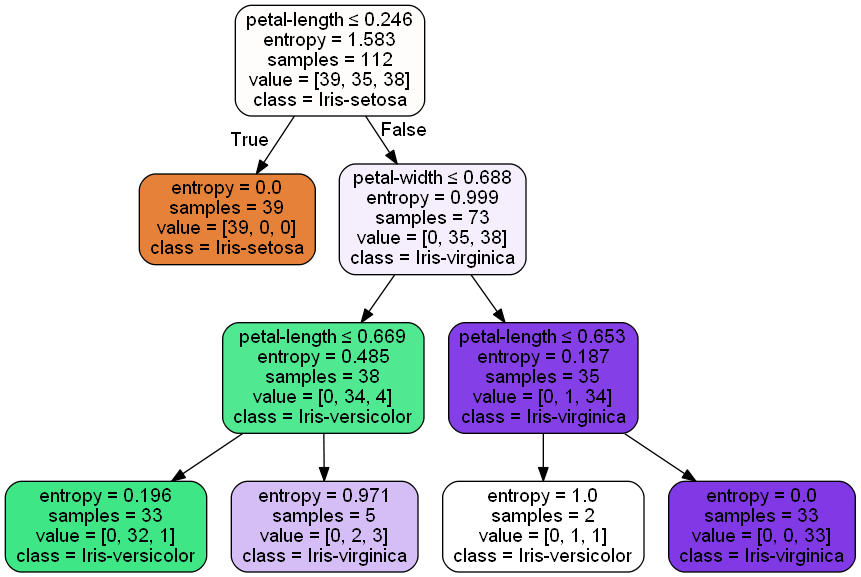

In [101]:
import pydotplus
from sklearn.tree import export_graphviz
from IPython.core.display import Image
import matplotlib.pyplot as plt

# 그래프 설정

# out_file=None : 결과를 파일로 저장하지 않겠다.
# filled=True : 상자 채우기
# rounded=True : 상자모서리 둥그렇게 만들기
# special_characters=True : 상자안에 내용 넣기

dot_data = export_graphviz(classifier, out_file=None,
                           feature_names=df.columns.values[0:4],
                           class_names=classifier.classes_,
                           filled=True, rounded=True,
                           special_characters=True)

 
# 그래프 그리기

dot_data
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


# 그래프 해석
#첫번째 줄 : 분류 기준
#entropy : 엔트로피값
#sample : 분류한 데이터 개수
#value : 클래스별 데이터 개수
#class : 예측한 답